<a href="https://colab.research.google.com/github/pedroigp/FIAP-Tech-Challenge-Fase1/blob/main/Tech_Challenge_1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# O problema
Você é um profissional encarregado de desenvolver um modelo preditivo de regressão para prever o valor dos custos médicos individuais cobrados pelo
seguro de saúde.

# Tarefas
**Exploração de dados:**
* Carregue a base de dados e explore suas características.
* Analise estatísticas descritivas e visualize distribuições relevantes.

**Pré-processamento de dados:**
* Realize a limpeza dos dados, tratando valores ausentes (se
necessário).
* Converta variáveis categóricas em formatos adequados para
modelagem.

**Modelagem:**
* Crie um modelo preditivo de regressão utilizando uma técnica à sua
escolha (por exemplo, Regressão Linear, Árvores de Decisão etc).
* Divida o conjunto de dados em conjuntos de treinamento e teste.

**Treinamento e avaliação do modelo:**
* Treine o modelo com o conjunto de treinamento.

**Validação estatística:**
* Utilize métricas estatísticas para validar a eficácia do modelo (p-value,
intervalos de confiança).

# O que avaliaremos:
* Apresente resultados visuais, como gráficos de previsões vs. valores reais.
* Elabore um relatório que inclua uma análise dos resultados, insights obtidos e validação estatística.

**Observações:**
Esperamos que o modelo seja capaz de fazer previsões confiáveis dos custos médicos individuais com base nas características fornecidas.

Importando os Dados

O dataset insurance.csv está disponível no github da matéria Machine Learning.

[Link Github](https://github.com/FIAP/CURSO_IA_ML/tree/main)


In [22]:
import pandas as pd
# para deixar todas as saídas com os mesmos valores
import numpy as np
np.random.seed(42)
import os

# Para plots bonitinhos
%matplotlib inline
import matplotlib as mpl
import matplotlib.pyplot as plt
mpl.rc('axes', labelsize=14)
mpl.rc('xtick', labelsize=12)
mpl.rc('ytick', labelsize=12)



**Parte 1 - Exploração de Dados**
* Carregue a base de dados e explore suas características.
* Analise estatísticas descritivas e visualize distribuições relevantes.

In [ ]:
# Carregando os dados
dataset = pd.read_csv("insurance.csv")

In [23]:
dataset.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


In [24]:
# Quantas linhas e colunas
dataset.shape

(1338, 7)

In [25]:
# Informações básicas dos dados do dataframe
dataset.info()
# o resultado indica que não tem dados nulos


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


In [26]:
# Começar analisando os dados textos
# Ver quantas categorias existem nos campos textos
set(dataset["sex"])

{'female', 'male'}

In [27]:
set(dataset["smoker"])

{'no', 'yes'}

In [28]:
set(dataset["region"])

{'northeast', 'northwest', 'southeast', 'southwest'}

In [29]:
# Ver quantidade por categoria utilizando a função value_counts()
dataset["sex"].value_counts()

,count
sex,
male,676
female,662


In [30]:
dataset["smoker"].value_counts()

,count
smoker,
no,1064
yes,274


In [31]:
dataset["region"].value_counts()

,count
region,
southeast,364
southwest,325
northwest,325
northeast,324


In [32]:
# Agora vamos analisar os dados do tipo numérico com a função describe():
dataset.describe()

,age,bmi,children,charges
count,1338.000000,1338.000000,1338.000000,1338.000000
mean,39.207025,30.663397,1.094918,13270.422265
std,14.049960,6.098187,1.205493,12110.011237
min,18.000000,15.960000,0.000000,1121.873900
25%,27.000000,26.296250,0.000000,4740.287150
50%,39.000000,30.400000,1.000000,9382.033000
75%,51.000000,34.693750,2.000000,16639.912515
max,64.000000,53.130000,5.000000,63770.428010


array([[<Axes: title={'center': 'age'}>, <Axes: title={'center': 'bmi'}>],
       [<Axes: title={'center': 'children'}>,
        <Axes: title={'center': 'charges'}>]], dtype=object)

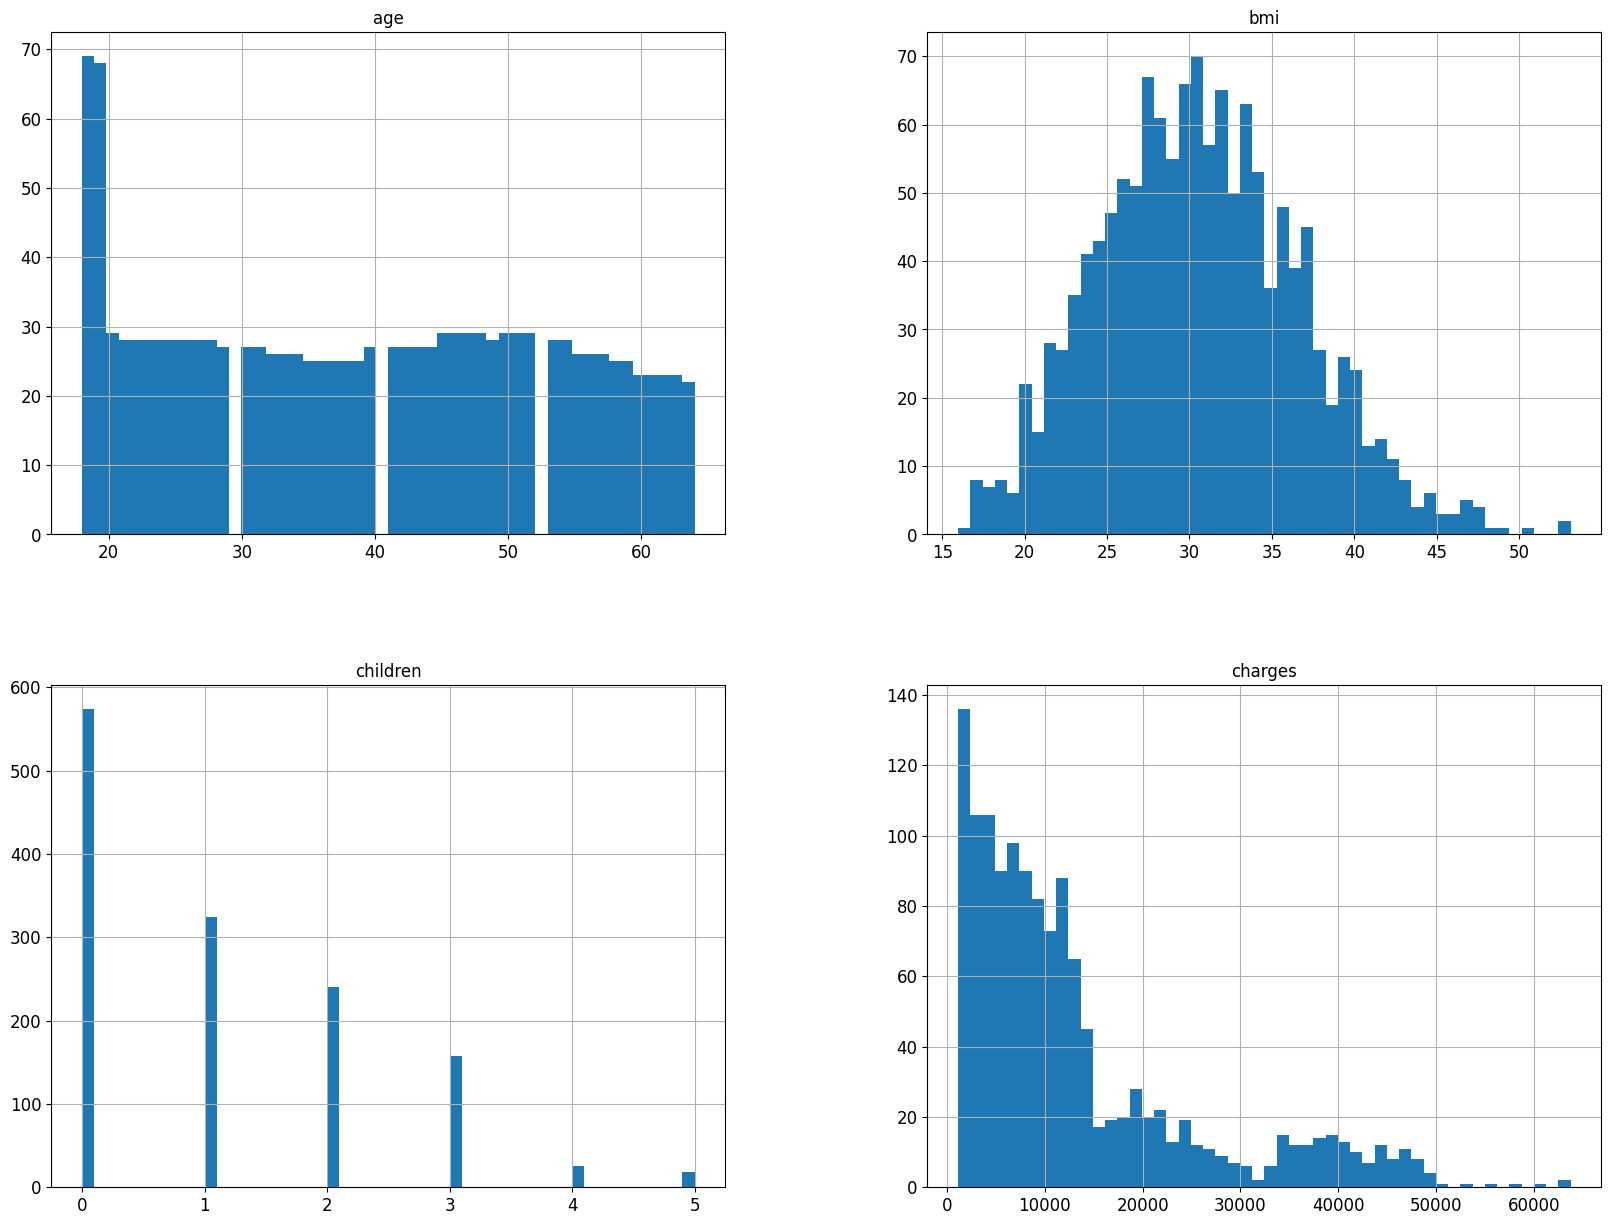

In [33]:
# Analisando algumas distribuições com histogramas:

%matplotlib inline
import matplotlib.pyplot as plt
dataset.hist(bins=50, figsize=(20,15))

In [35]:
# Matriz de Correlação
# Criando dataframe somente com nossas variáveis numericas
df_numerico = dataset.select_dtypes([np.number])
# Calcula a matriz de correlação
correlation_matrix = df_numerico.corr()
correlation_matrix

,age,bmi,children,charges
age,1.000000,0.109272,0.042469,0.299008
bmi,0.109272,1.000000,0.012759,0.198341
children,0.042469,0.012759,1.000000,0.067998
charges,0.299008,0.198341,0.067998,1.000000


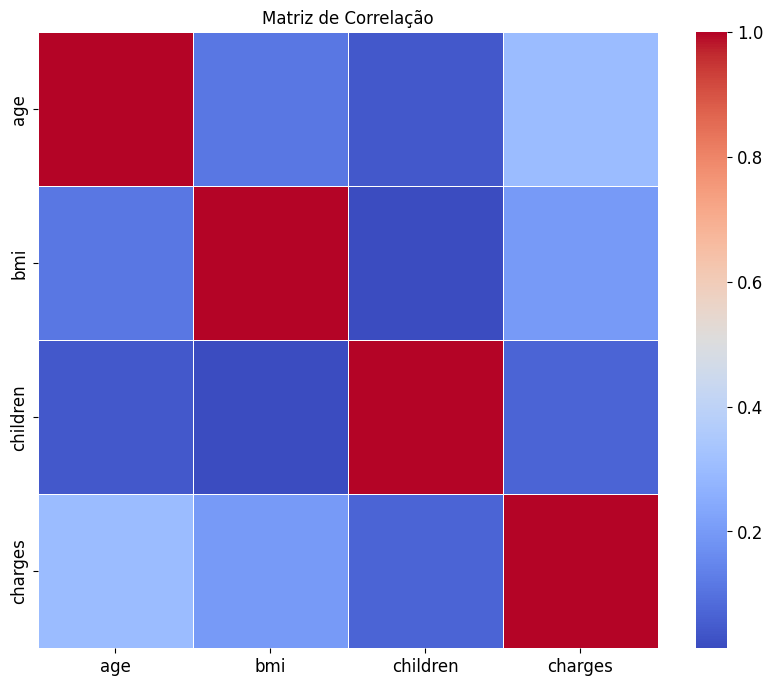

In [36]:
import seaborn as sns
# Visualização da matriz de correlação
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, cmap='coolwarm', annot=False, fmt=".2f", linewidths=.5)
plt.title('Matriz de Correlação')
plt.show()

In [37]:

# Vamos verificar quantidades de nulos em nosso dataframe, não podemos aplicar o PCA
# se nossos dados tiverem linhas nulas, devemos tratar esses casos caso ocorram
# Existem diversas técnicas para tratar dados nulos, o método de escolha depende muito do seu objetivo
df_numerico.isnull().sum()

,0
age,0
bmi,0
children,0
charges,0


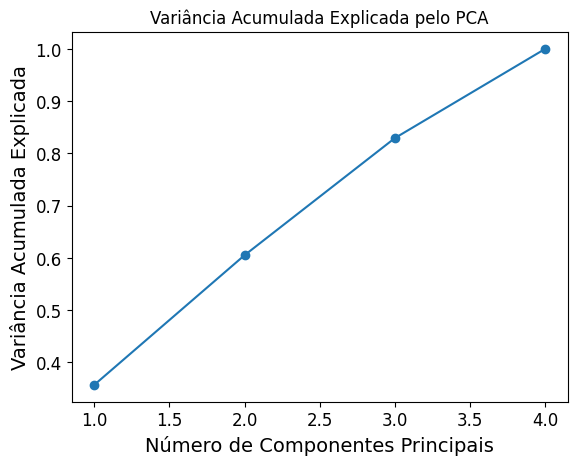

In [41]:
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
# Normalizando os dados utilizando o standardScaler
# (Padroniza as features removendo a média e escala a variância a uma unidade.
# Isso significa que para cada feature, a média seria 0, e o Desvio Padrão seria 1)
#X = StandardScaler().fit_transform(X)
#Visualizando nossos dados padronizados
#df_padronizado = pd.DataFrame(data=X, columns=features)
#display(df_padronizado.head())
# Padroniza as variáveis
scaler = StandardScaler()
df_padronizado = scaler.fit_transform(df_numerico)
# Calcula a variância explicada acumulada
pca = PCA()
pca.fit(df_padronizado)
variancia_cumulativa = np.cumsum(pca.explained_variance_ratio_)
# Visualização da variância explicada acumulada
plt.plot(range(1, len(variancia_cumulativa) + 1), variancia_cumulativa, marker='o')
plt.xlabel('Número de Componentes Principais')
plt.ylabel('Variância Acumulada Explicada')
plt.title('Variância Acumulada Explicada pelo PCA')
plt.show()



**Parte 2 - Pré-processamento de dados:**
* Realize a limpeza dos dados, tratando valores ausentes (se necessário).
* Converta variáveis categóricas em formatos adequados para modelagem.

<br>
Padronizar e normalizar os dados. PCA



